<a href="https://colab.research.google.com/github/sanaomaro/old_notebooks/blob/main/SPAMFILTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from autocorrect import Speller
spell=Speller()
from tqdm import tqdm
import re

In [51]:
data = pd.read_csv('https://raw.githubusercontent.com/pydeveloperashish/Spam-Classifier-using-naive-bayes/main/spam.csv', encoding='ISO-8859-1')

In [52]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [53]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ã_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [54]:
data.shape

(5572, 5)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [56]:
data.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [57]:
data[: 1]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN


In [58]:
print(data.iloc[:,2].isnull().count())
print(data.iloc[:,3].isnull().count())
print(data.iloc[:,4].isnull().count())

5572
5572
5572


In [59]:
data.drop(data.iloc[:, 2:5], axis = 1, inplace=True)

In [60]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [61]:
#data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4' ], axis=1)

In [62]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [63]:
data.columns =  ['labels', 'messages']

In [64]:
data

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


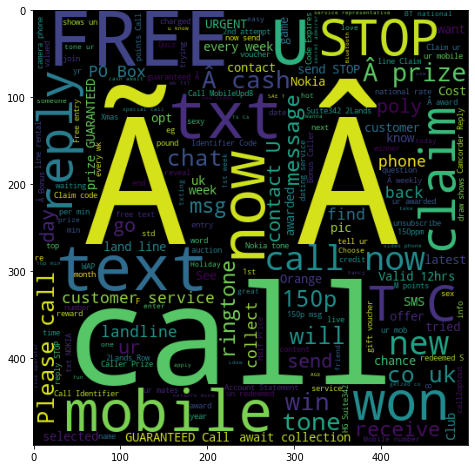

In [65]:
spam_words = ''.join(list(data[data['labels']=='spam']['messages']))
spam_wc = WordCloud(width=500, height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

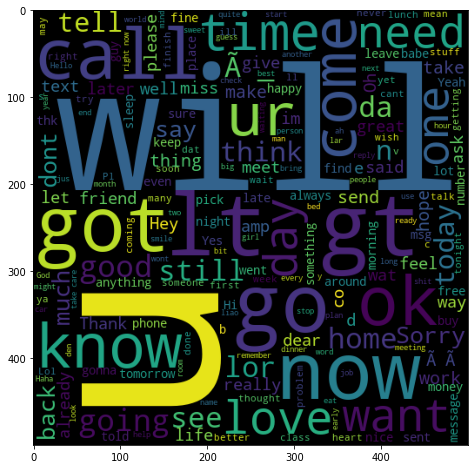

In [66]:
spam_words = ''.join(list(data[data['labels']=='ham']['messages']))
spam_wc = WordCloud(width=500, height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

In [67]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [69]:
dataS = data['messages']
type(dataS)

pandas.core.series.Series

In [70]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [71]:

dataV = data['messages'].values
dataV

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [72]:
dataL = list(data['messages'])
print(type(dataL))
dataL


<class 'list'>


['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Ã¥Â£1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea Ã¥Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'H

In [73]:
stop_words = set(stopwords.words("english"))

In [74]:
filtered_list = []
tokenized_rows = []

In [75]:
new_data1 = []
for i in tqdm(range(data.shape[0])):
  rows = data.iloc[i, 1]
  rows = re.sub('[^A-Za-z]', ' ', rows)
  rows = rows.lower()
  tokenized_rows = word_tokenize(rows)
  for i in tokenized_rows:
    if i not in stop_words:
      filtered_list.append(i)
      stemmed_words = [spell(stemmer.stem(i)) for i in filtered_list]

  final_rows = ' '.join(stemmed_words)
  new_data1.append(final_rows)

  2%|▏         | 132/5572 [1:15:17<51:43:06, 34.23s/it]


KeyboardInterrupt: ignored

In [76]:
new_data=[]

for i in tqdm(range(data.shape[0])):
    lines=data.iloc[i,1]
    # removing non alphabatic characters
    lines= re.sub('[^A-Za-z]',' ',lines)
    # lowering the every word
    lines=lines.lower()
    
    # tokenization
    tokenized_lines=word_tokenize(lines)
    
    # removing stop words ,stemming and spell correction
    processed_lines=[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
            
    final_lines=' '.join(processed_lines)
    new_data.append(final_lines)

100%|██████████| 5572/5572 [03:51<00:00, 24.09it/s]


In [77]:
new_data

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'frees hey dark week word back like fun still tb ok xxx std chg send rev',
 'even brother like speak treat like aid patent',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'winner value network custom select received prize reward claim call claim code kl valid hour',
 'mobil month u r entity update latest colour mobil camera free call mobil update co free',
 'gon na home soon want talk stuff anymore tonight k cri enough today',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www duk net lccltd box link rw',
 'search right word thank breathe pro

In [78]:
len(new_data)

5572

In [82]:
Y=data['labels']
Y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: labels, Length: 5572, dtype: object

In [83]:
Y.value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,Y,test_size=0.25)

In [86]:
X_train

['pleas call immer urgent message wait',
 'thank winner notify sm good luck future market reply stop custom service',
 'ok sent u da latest version da project',
 'not much chilling home super bowl plan',
 'oki',
 'good afternoon loverboy go day luck come way think sweet send love across sea make smile happy',
 'app class vary playa',
 'want get laid tonight want real dog local sent direct ur mob join uk largest dog network bt texting gravel nt ec p msg p',
 'somewhere beneath pale moon light someone think u dream come true goodnit amp sweet dream',
 'reassure crazy world',
 'send content page',
 'kate jackson rec center ish right',
 'fffff text deem far gone',
 'go home lia ask dad pick',
 'good word word may lead u dismay mani time',
 'god ask forgive little child gave love reply',
 'sure result offer',
 'co darren say consider mah ask',
 'okay well thank clarify',
 'much u tri get',
 'know lab goal went',
 'took tablet reaction more',
 'im gon na miss u much',
 'england tell decide l

In [87]:
Y_train

4295    spam
1145    spam
3240     ham
1348     ham
4242     ham
        ... 
1026     ham
2505     ham
5       spam
214      ham
3360     ham
Name: labels, Length: 4179, dtype: object

In [88]:
Y_test

2424     ham
3632     ham
2453     ham
3485     ham
5144     ham
        ... 
3521     ham
3554    spam
5285    spam
1900     ham
1764    spam
Name: labels, Length: 1393, dtype: object

In [89]:
from sklearn.feature_extraction.text import CountVectorizer  #tf_idf
matrix=CountVectorizer()

In [90]:
X_train_vect=matrix.fit_transform(X_train).toarray()
X_test_vect=matrix.transform(X_test).toarray()

In [91]:
X_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [92]:
X_test_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [93]:
Y_train

4295    spam
1145    spam
3240     ham
1348     ham
4242     ham
        ... 
1026     ham
2505     ham
5       spam
214      ham
3360     ham
Name: labels, Length: 4179, dtype: object

In [94]:
Y_test

2424     ham
3632     ham
2453     ham
3485     ham
5144     ham
        ... 
3521     ham
3554    spam
5285    spam
1900     ham
1764    spam
Name: labels, Length: 1393, dtype: object

In [95]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [96]:
model.fit(X_train_vect,Y_train)

GaussianNB()

In [97]:
model.classes_

array(['ham', 'spam'], dtype='<U4')

In [98]:
Y_pred=model.predict(X_test_vect)

In [99]:
Y_pred

array(['ham', 'ham', 'ham', ..., 'spam', 'ham', 'spam'], dtype='<U4')

In [100]:

from sklearn.metrics import accuracy_score, confusion_matrix

In [101]:
accuracy_score(Y_test,Y_pred) * 100

85.1399856424982